
# Lesson XX: Introduction to Geopandas
In this lesson we introduce **geopandas** and some additional spatial python packages.


---


## General information

### Sources

This lesson is inspired by a workshop from a course at [TU Berlin on energy system modelling with data](https://github.com/fneum/data-science-for-esm) written by Fabian Neumann (Copyright (c) 2022, Fabian Neumann). This version was adapted  by Ruth Hamilton.

### About this document

This is a [Google Colab Notebook](https://colab.research.google.com/?utm_source=scs-index). This particular notebook is designed to introduce you to a few of the basic concepts of programming in Python. Like other common notebook formats (e.g. [Jupyter](http://jupyterlab.readthedocs.io/en/stable/) ), the contents of this document are divided into cells, which can contain:

*   Markdown-formatted text,
*   Python code, or
*   raw text

You can execute a snippet of code in a cell by pressing **Shift-Enter** or by pressing the **Run Cell** button that appears when your cursor is on the cell .



---


# Introduction to `geopandas` and `cartopy`

## Basic Setup

We will be using `pandas` and `matplotlib` in this tutorial as we have previously.

Alongside this, we will also be using some additional packages:
- [geopandas](https://geopandas.org/en/stable/index.html) - a package developed to make working with geospatial data in python easier;
- [cartopy](https://scitools.org.uk/cartopy/docs/v0.15/index.html//) - a pacakage designed to make drawing maps for data analysis and visualisation as easy as possible; and



We can install these using the `!pip install...` command we use to install  pandas. Don't forget to import them, too...

In [1]:
!pip install pandas geopandas matplotlib cartopy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

We'll also supress a few warnings.

In [3]:
import warnings

warnings.filterwarnings("ignore")

## Why do we need something other than `pandas`?

Let's look at some data. We are going to be using a dataset of conventional power plants in Europe.

Load the dataset  as a pandas DataFrame and look at the first 3 rows.

In [4]:

fn="https://raw.githubusercontent.com/ruth-ham/TRP479_2023_2024/main/Geopandas/powerplants.csv"
ppl = pd.read_csv(fn, index_col=0)

In [5]:
ppl.head(3)

Name   Fueltype     Technology    Set      Country  Capacity  \
id                                                                          
0        Borssele  Hard Coal  Steam Turbine     PP  Netherlands     485.0   
1    Sainte Croix      Hydro      Reservoir  Store       France     132.3   
2   Pied De Borne      Hydro      Reservoir  Store       France     109.4   

    Efficiency  DateIn  DateRetrofit  DateOut      lat     lon  Duration  \
id                                                                         
0          NaN  1973.0           NaN   2034.0  51.4332  3.7160       NaN   
1          NaN  1974.0           NaN      NaN  43.7375  6.1343       NaN   
2          NaN  1965.0           NaN      NaN  44.4788  3.9858       NaN   

    Volume_Mm3  DamHeight_m  StorageCapacity_MWh                   EIC  \
id                                                                       
0          0.0          0.0                  0.0  {'49W000000000054X'}   
1          0.0          0.0                  0.0  {'17W100P100P0297X'}   
2          0.0          0.0                  0.0  {'17W100P100P0289W'}   

                                            projectID  
id                                                     
0   {'BEYONDCOAL': {'BEYOND-NL-2'}, 'ENTSOE': {'49...  
1   {'ENTSOE': {'17W100P100P0297X'}, 'GEM': {'G601...  
2   {'ENTSOE': {'17W100P100P0289W'}, 'GEM': {'G601...

This dataset includes coordinates (latitude and longitude), which allows us to  plot the location and capacity of all power plants in a scatter plot. We can use the **pandas** python plotting function to do this ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)).

The line `ppl.plot.scatter("lon", "lat", s=ppl.Capacity / 1e3)` uses the latitude and longitude attributes as `x,y` values for the scatter plot and the the Capacity attribute to determine the *size* of each point via the size argument, `s`.

<Axes: xlabel='lon', ylabel='lat'>

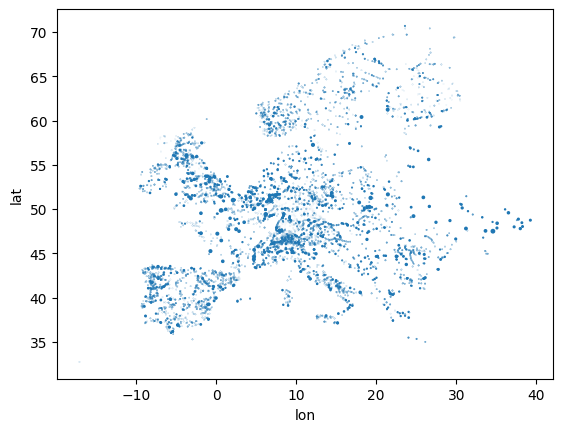

In [6]:
ppl.plot.scatter("lon", "lat", s=ppl.Capacity / 1e3)



This shows the recognisable shape of Europe, however, the figure lacks the geogprahic context that we'd normally expect for a map; features like shorelines and country borders etc.

To add those, we need to use **Geopandas**.

## Geopandas - a Pandas extension for geospatial data

<img src="https://geopandas.org/en/stable/_images/geopandas_logo.png" width="400px" />

Geopandas extends `pandas` by adding support for geospatial data.

The core data structure in GeoPandas is the `geopandas.GeoDataFrame`, a subclass of `pandas.DataFrame`, that can store geometry columns and perform spatial operations.

<img src="https://geopandas.org/en/stable/_images/dataframe.svg" width="600px" />

:::{note}
Documentation for this package is available at https://geopandas.org/en/stable/.
:::

Typical geometries are points, lines, and polygons. They come from another library called [`shapely`](https://shapely.readthedocs.io/en/stable/manual.html), which helps you create, analyze, and manipulate two-dimensional shapes and their properties, such as points, lines, and polygons.

<img src="https://geobgu.xyz/py/_images/simple_feature_types.svg" width="600px" />

First, we need to import the `geopandas` package (remember, we already installed it using the `!pip install...` command earlier). The conventional alias is `gpd`:

In [7]:
import geopandas as gpd

The first step is to convert the latitude and longitude attributes given in the dataset to formal spatial geometries. We do this using the `gpd.points_from_xy()` function (this is analagous to similar processes of converting `.csv` data to shapefiles in ArcGIS and QGIS). Once we have converted the `x,y` attributes to **point** geometry, we can convert the pandas DataFrame to a GeoDataFrame using the geopandas `gpd.GeoDataFrame` function. As with any spatial data, we also need to specify a coordinate reference system (CRS). In this case, we are using longitude and latitude values which means that the code '4326' is appropriate.

**Remember** the functions with the `gpd.` prefix are from the **geopandas** package which we *imported* as `gpd`.

In [8]:
geometry = gpd.points_from_xy(ppl["lon"], ppl["lat"])
gdf_ppl = gpd.GeoDataFrame(ppl, geometry=geometry, crs=4326)

Now, our GeoDataFrame (`gdf_ppl`) looks like this (note the final column):

In [9]:
gdf_ppl.head(3)

Name   Fueltype     Technology    Set      Country  Capacity  \
id                                                                          
0        Borssele  Hard Coal  Steam Turbine     PP  Netherlands     485.0   
1    Sainte Croix      Hydro      Reservoir  Store       France     132.3   
2   Pied De Borne      Hydro      Reservoir  Store       France     109.4   

    Efficiency  DateIn  DateRetrofit  DateOut      lat     lon  Duration  \
id                                                                         
0          NaN  1973.0           NaN   2034.0  51.4332  3.7160       NaN   
1          NaN  1974.0           NaN      NaN  43.7375  6.1343       NaN   
2          NaN  1965.0           NaN      NaN  44.4788  3.9858       NaN   

    Volume_Mm3  DamHeight_m  StorageCapacity_MWh                   EIC  \
id                                                                       
0          0.0          0.0                  0.0  {'49W000000000054X'}   
1          0.0          0.0                  0.0  {'17W100P100P0297X'}   
2          0.0          0.0                  0.0  {'17W100P100P0289W'}   

                                            projectID  \
id                                                      
0   {'BEYONDCOAL': {'BEYOND-NL-2'}, 'ENTSOE': {'49...   
1   {'ENTSOE': {'17W100P100P0297X'}, 'GEM': {'G601...   
2   {'ENTSOE': {'17W100P100P0289W'}, 'GEM': {'G601...   

                    geometry  
id                            
0   POINT (3.71600 51.43320)  
1   POINT (6.13430 43.73750)  
2   POINT (3.98580 44.47880)

With the additional `geometry` columns, it is now even easier to plot the geographic data (note, we don't even have to specify the geometry attribute):

<Axes: >

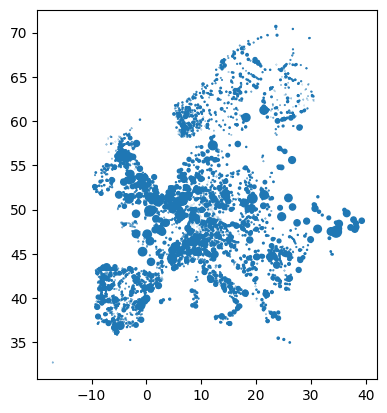

In [10]:
gdf_ppl.plot(
    markersize=gdf_ppl.Capacity / 1e2,
)

To symbolise the data based on an attribute, we can simply add the `column` argument.

<Axes: >

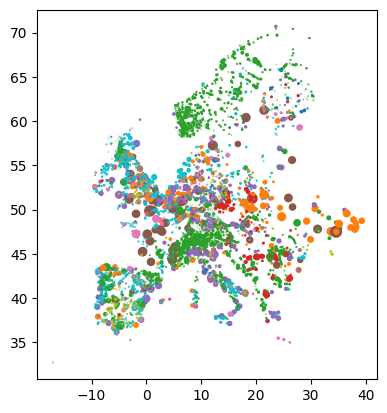

In [11]:
gdf_ppl.plot(
    column="Fueltype",
    markersize=gdf_ppl.Capacity / 1e2,
)

We can also start up an interactive map to explore the geodata in more detail. This uses the `explore` function in geopandas to build an interactive map using folium/leaflet.js. You can find out more about the `explore` function [here](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html).





In [12]:
gdf_ppl.explore(column="Fueltype",width = 800, height= 800)

Output hidden; open in https://colab.research.google.com to view.

## Map Projections with Cartopy

<img src="https://scitools.org.uk/cartopy/docs/v0.16/_images/sphx_glr_logo_001.png" width="300px" />

Cartopy is a Python package designed for geospatial data processing and has exposed an interface to enable easy map creation using `matplotlib`.

The Earth is a globe, but we present maps usually on two-dimensional surfaces. Hence, we typically need to *project* data points onto flat surfaces (e.g. screens, paper). However, we will always loose some information in doing so.


<img src="https://raw.githubusercontent.com/SciTools/cartopy-tutorial/master/static/orange_peel.jpg" width="500px" />


A map projection is:

> a systematic transformation of the latitudes and longitudes of locations from the surface of a sphere or an ellipsoid into locations on a plane. [Wikipedia: Map projection](https://en.wikipedia.org/wiki/Map_projection).


Different projections **preserve different metric properties**. As a result,
converting geodata from one projection to another is a common exercise in geographic data science.

- **conformal projections** preserve angles/directions (e.g. Mercator projection)
- **equal-area projections** preserve area measure (e.g. Mollweide)
- **equidistant projections** preserve distances between points (e.g. Plate carrée)
- **compromise projections** seek to strike a balance between distortions (e.g. Robinson)

If you like the "Orange-as-Earth" analogy for projections, checkout [this numberphile video](https://www.youtube.com/watch?v=D3tdW9l1690) by Hannah Fry.

---
**Note**
>Documentation for this package is available at https://scitools.org.uk/cartopy/docs/latest/.
---

First, we need to import the relevant parts of the `cartopy` package:

In [13]:
import cartopy
import cartopy.crs as ccrs

Let's draw a first map with `cartopy` outlining the global coastlines in the so-called [plate carrée projection (equirectangular projection)](https://en.wikipedia.org/wiki/Equirectangular_projection):

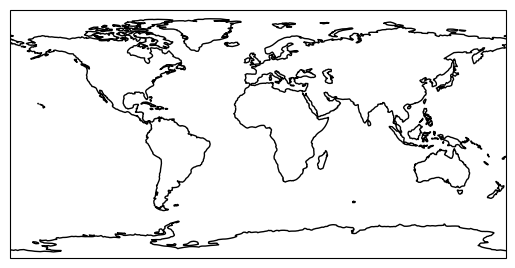

In [14]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()


A list of the available projections can be found on the [Cartopy projection list page](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#cartopy-projections).

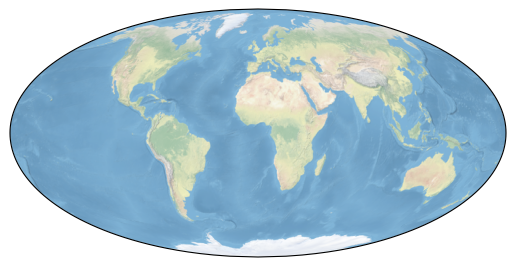

In [15]:
ax = plt.axes(projection=ccrs.Mollweide())
#ax.coastlines()
ax.stock_img()

The methods `.coastlines()` and `.stock_img()` are defined within the `cartopy` package and are intended to integrate with `matplotlib`. You can find a list of the methods in the *'Cartopy matplotlib integration reference document'* [here](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/geoaxes.html).

We can combine the functionality of `cartopy` with `geopandas` plots:

<GeoAxes: >

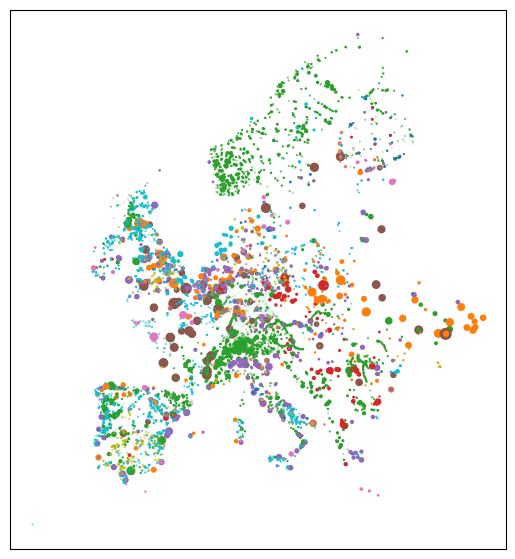

In [16]:
fig = plt.figure(figsize=(7, 7)) #creates a matplotlib figure instance

ax = plt.axes(projection=ccrs.PlateCarree()) #adds axes to the figure and specifies a projection

gdf_ppl.plot(
    ax=ax,
    column="Fueltype",
    markersize=gdf_ppl.Capacity / 1e2,
)  #adds the gdf_ppl data to the axes

We can add further [geographic features](https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html#the-cartopy-feature-interface) to this map for better orientation.

For instance, we can add the coastlines...

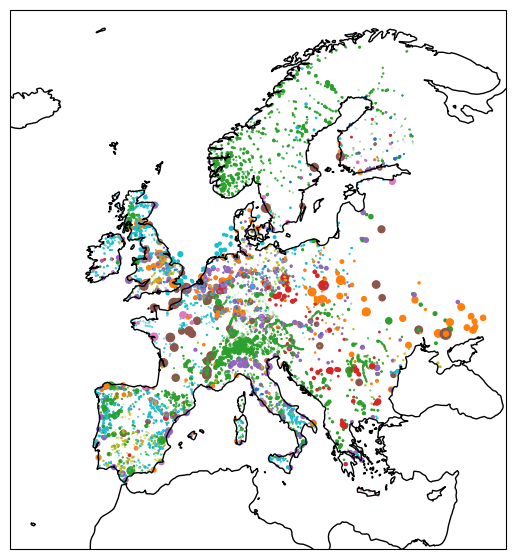

In [17]:
ax.coastlines()
fig

... country borders ...

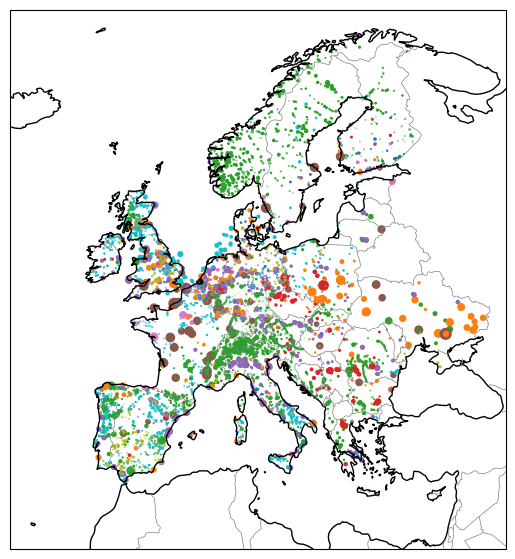

In [18]:
ax.add_feature(cartopy.feature.BORDERS, color="grey", linewidth=0.5)
fig

... colour in the ocean in blue ...

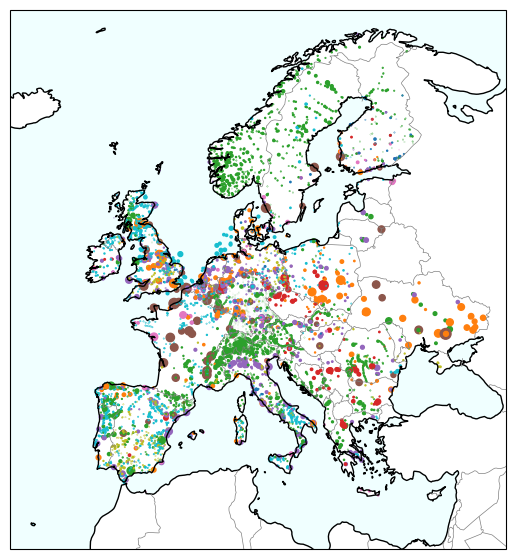

In [19]:
ax.add_feature(cartopy.feature.OCEAN, color="azure")
fig

...and color in the land area in yellow ...

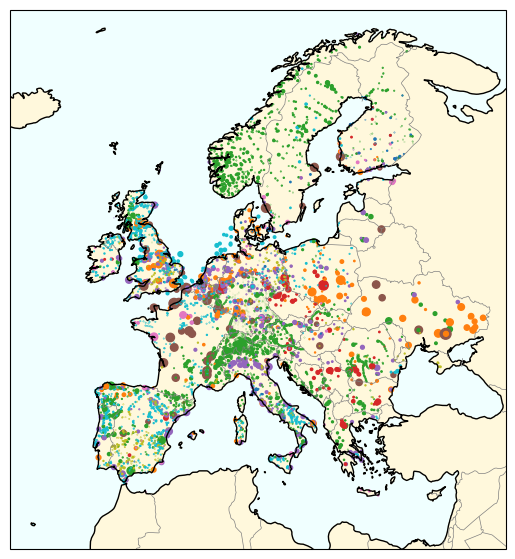

In [20]:
ax.add_feature(cartopy.feature.LAND, color="cornsilk")
fig

Geopandas will automatically calculate sensible bounds for the plot given the geographic data.
But we can also manually zoom in or out by setting the spatial extent with the `.set_extent()` method:

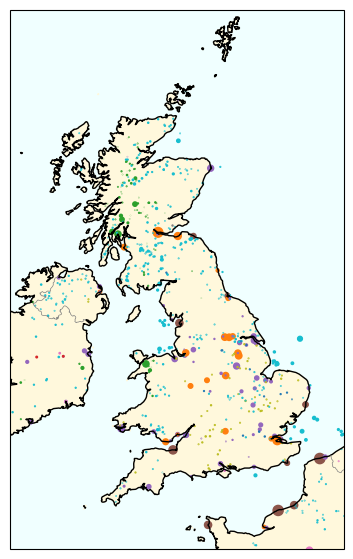

In [21]:
ax.set_extent([3, -9, 49, 61])
fig

### Reprojecting a `GeoDataFrame`

In `geopandas`, we can use the function `.to_crs()` to convert a `GeoDataFrame` to a desired coordinate reference system. In this particular case, we use the `proj4_init` string of an initialised `cartopy` projection to reproject our power plant `GeoDataFrame`.

> A `proj4_init` string is a text-based representation of a coordinate reference system (CRS) that defines the parameters for transforming geographical coordinates between different spatial reference systems, used by the PROJ library. It will look similar to this: "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs".

You can find the list of Cartopy projections [here](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html#osgb).

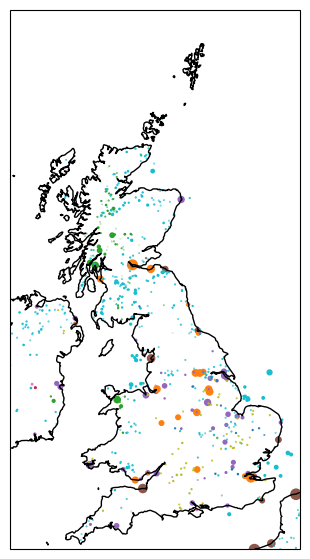

In [22]:

fig = plt.figure(figsize=(7, 7))

#specify new_crs variable to desired projection (British National Grid)
new_crs = ccrs.OSGB()

#create axes object with using new projection
ax = plt.axes(projection=new_crs)

#reproject geodataframe (gdf) to new crs (new_crs) using .to_crs function.
gdf_ppl.to_crs(new_crs.proj4_init).plot(
    ax=ax,
    column="Fueltype",
    markersize=gdf_ppl.Capacity / 1e2,
)


ax.coastlines()


## Reading and Writing Files with `geopandas`

In the following example, we'll load a dataset containing the [NUTS regions](https://en.wikipedia.org/wiki/Nomenclature_of_Territorial_Units_for_Statistics):

> Nomenclature of Territorial Units for Statistics or NUTS (French: Nomenclature des unités territoriales statistiques) is a geocode standard for referencing the subdivisions of countries for statistical purposes.

Our ultimate **goal** for this part of the tutorial is to map the power plant capacities to the NUTS-2 region they belong to.

<img src="https://ec.europa.eu/eurostat/documents/345175/501899/framing" width="400px" />

Common filetypes for vector-based geospatial datasets are GeoPackage (`.gpkg`), GeoJSON (`.geojson`), File Geodatabase (`.gdb`), or Shapefiles (`.shp`).

In `geopandas` we can use the `gpd.read_file()` function to read such files. So let's start:

In [23]:
url="https://raw.githubusercontent.com/ruth-ham/TRP479_2023_2024/main/Geopandas/NUTS_RG_10M_2021_4326.geojson"

In [24]:
nuts = gpd.read_file(url)

In [25]:
nuts.head(3)

id NUTS_ID  LEVL_CODE CNTR_CODE   NAME_LATN  NUTS_NAME  MOUNT_TYPE  \
0  BG423   BG423          3        BG  Pazardzhik  Пазарджик         3.0   
1  BG424   BG424          3        BG     Smolyan     Смолян         3.0   
2  BG425   BG425          3        BG   Kardzhali   Кърджали         3.0   

   URBN_TYPE  COAST_TYPE    FID  \
0          2           3  BG423   
1          3           3  BG424   
2          3           3  BG425   

                                            geometry  
0  POLYGON ((24.42101 42.55306, 24.41032 42.46950...  
1  POLYGON ((25.07422 41.79348, 25.05851 41.75177...  
2  POLYGON ((25.94863 41.32034, 25.90644 41.30757...

It is good practice to set an index. This is because looking up rows by index is much faster than looking up rows by column value.

You can use `.set_index()` to do that:

In [26]:
nuts = nuts.set_index("id")

In [27]:
nuts.head(3)

NUTS_ID  LEVL_CODE CNTR_CODE   NAME_LATN  NUTS_NAME  MOUNT_TYPE  \
id                                                                      
BG423   BG423          3        BG  Pazardzhik  Пазарджик         3.0   
BG424   BG424          3        BG     Smolyan     Смолян         3.0   
BG425   BG425          3        BG   Kardzhali   Кърджали         3.0   

       URBN_TYPE  COAST_TYPE    FID  \
id                                    
BG423          2           3  BG423   
BG424          3           3  BG424   
BG425          3           3  BG425   

                                                geometry  
id                                                        
BG423  POLYGON ((24.42101 42.55306, 24.41032 42.46950...  
BG424  POLYGON ((25.07422 41.79348, 25.05851 41.75177...  
BG425  POLYGON ((25.94863 41.32034, 25.90644 41.30757...

We can also check out the geometries in the dataset with `.geometry`:

In [28]:
nuts.geometry

id
BG423    POLYGON ((24.42101 42.55306, 24.41032 42.46950...
BG424    POLYGON ((25.07422 41.79348, 25.05851 41.75177...
BG425    POLYGON ((25.94863 41.32034, 25.90644 41.30757...
CH011    MULTIPOLYGON (((6.86623 46.90929, 6.89621 46.9...
CH012    POLYGON ((8.47767 46.52760, 8.39953 46.48872, ...
                               ...                        
LV       POLYGON ((27.35158 57.51824, 27.54521 57.53444...
ME       POLYGON ((20.06394 43.00682, 20.32958 42.91149...
MK       POLYGON ((22.36021 42.31116, 22.51041 42.15516...
SK0      POLYGON ((19.88393 49.20418, 19.96275 49.23031...
IT       MULTIPOLYGON (((12.47792 46.67984, 12.69064 46...
Name: geometry, Length: 2010, dtype: geometry

With `.crs` we can check in which coordinate reference system the data is given:

In [29]:
nuts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
nuts.total_bounds

array([-63.08825, -21.38917,  55.83616,  80.76427])




Let's filter by NUTS-2 level...

In [31]:

nuts2 = nuts.query("LEVL_CODE == 2")

... and explore what kind of geometries we have in the dataset ...

In [32]:
nuts2.explore(width=600, height=600)

To write a GeoDataFrame back to file use `GeoDataFrame.to_file()`. The file format is inferred from the file ending.

In [33]:
nuts2.to_file("tmp.geojson")

## Calculating the areas and buffers

The first thing we need to do to calculate area or buffers is to reproject the `GeoDataFrame` to an equal-area projection (here: [EPSG:3035](https://epsg.io/3035) which is valid only within Europe; global alternative is the Mollweide projection [EPSG:54009](https://epsg.io/54009)):

In [34]:
nuts2 = nuts2.to_crs(3035)

The area can be accessed via `.area` and is given in m² (after projection). Let's convert to km²:

In [35]:
area = nuts2.area / 1e6
area

id
DE50       423.605494
DE60       746.525693
DE71      7380.655840
DE72      5437.113959
DE73      8255.844829
            ...      
HR06      8130.422886
NO02     51947.537170
NO06     41806.157268
NO07    113340.068567
NO08     25095.660837
Length: 334, dtype: float64

In [36]:
nuts2.explore(column=area, vmax=1e5,width=600, height=600)

We can also build a buffer of 1km around each geometry using `.buffer()`:

In [37]:
nuts2.buffer(1000).explore(width=600, height=600)

Output hidden; open in https://colab.research.google.com to view.

## Joining spatial datasets

Multiple `GeoDataFrames` can be combined via *spatial joins*.

Observations from two datasets are combined with the [`.sjoin()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html) function based on their **spatial relationship** to one another (e.g. whether they are intersecting or overlapping). You can read more about the specific options [here](https://geopandas.org/en/stable/docs/user_guide/mergingdata.html#binary-predicate-joins).

To perform a spatial join, you need to provide the following information:

- The two GeoDataFrames you want to join (e.g., `left_df` and `right_df`).
- The type of spatial relationship to test (e.g., `intersects`, `contains`, `within`). This is specified using the `op` parameter.
- The type of join to perform (e.g., `inner`, `left`, `right`). This is specified using the `how` parameter.

The `.sjoin()` function will then iterate through the geometries in both GeoDataFrames, evaluate the specified spatial relationship, and join the matching records.

For example, if the `op` parameter is set to 'intersects', the function will check if the geometries of each record in `left_df` intersect with the geometries of any records in `right_df`. If a match is found, the attributes of the corresponding records from both GeoDataFrames will be combined into a new record in the output GeoDataFrame.

By performing spatial joins, you can efficiently combine and analyze geospatial data based on their spatial relationships, without the need for explicit coordinate-based calculations.

Let's first reproject the `gdf_ppl` object to the same CRS as `nuts2`:

In [38]:
gdf_ppl = gdf_ppl.to_crs(3035)

Then, let's have a look at both datasets at once. We want to find out which points (representing power plants) lie within which shape (representing NUTS regions).

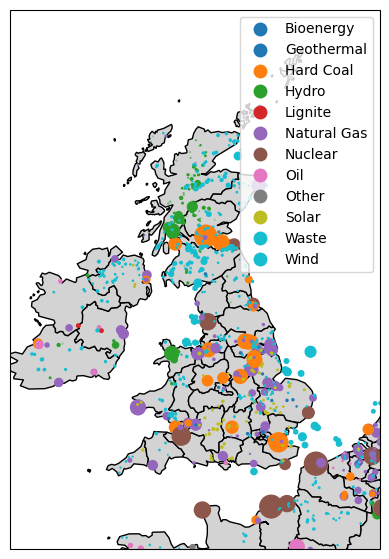

In [39]:
fig = plt.figure(figsize=(7, 7))

ax = plt.axes(projection=ccrs.epsg(3035))

nuts2.plot(ax=ax, edgecolor="black", facecolor="lightgrey")

gdf_ppl.to_crs(3035).plot(
    ax=ax, column="Fueltype", markersize=gdf_ppl.Capacity / 20, legend=True
)

ax.set_extent([3, -9, 49, 61])

We can now apply the `.sjoin` function to look for which power plants lie within which NUTS1 region. By default, `sjoin` looks for intersections and keeps the geometries of the *left* `GeoDataFrame`.

In [40]:
joined = gdf_ppl.sjoin(nuts2)

If we look at this new `GeoDataFrame`, we now have additional columns from the NUTS1 data:

In [41]:
joined.head(3)

Name Fueltype Technology    Set Country  Capacity  Efficiency  \
id                                                                          
1   Sainte Croix    Hydro  Reservoir  Store  France     132.3         NaN   
7   Saint Chamas    Hydro  Reservoir  Store  France     159.0         NaN   
8   Saint Esteve    Hydro  Reservoir  Store  France     141.0         NaN   

    DateIn  DateRetrofit  DateOut  ...  index_right  NUTS_ID  LEVL_CODE  \
id                                 ...                                    
1   1974.0           NaN      NaN  ...         FRL0     FRL0          2   
7   1965.0           NaN      NaN  ...         FRL0     FRL0          2   
8   1963.0           NaN      NaN  ...         FRL0     FRL0          2   

    CNTR_CODE                   NAME_LATN                   NUTS_NAME  \
id                                                                      
1          FR  Provence-Alpes-Côte d’Azur  Provence-Alpes-Côte d’Azur   
7          FR  Provence-Alpes-Côte d’Azur  Provence-Alpes-Côte d’Azur   
8          FR  Provence-Alpes-Côte d’Azur  Provence-Alpes-Côte d’Azur   

   MOUNT_TYPE URBN_TYPE COAST_TYPE   FID  
id                                        
1         0.0         0          0  FRL0  
7         0.0         0          0  FRL0  
8         0.0         0          0  FRL0  

[3 rows x 29 columns]

We can now use these new columns to group the capacities (and convert to a suitable unit):

In [42]:
cap = joined.groupby("NUTS_ID").Capacity.sum() / 1000  # GW

The variable `cap` should now contain the *total capacity* (in GigaWatts) of each NUTS2 region.

In [43]:
cap

NUTS_ID
AL01    1.447400
AL02    0.076454
AL03    0.219500
AT12    2.461900
AT13    2.001200
          ...   
UKM6    8.428300
UKM7    5.042100
UKM8    0.211000
UKM9    4.722700
UKN0    1.395000
Name: Capacity, Length: 286, dtype: float64

Let's quickly check if all NUTS2 regions have power plants:

In [44]:
nuts2.index.difference(cap.index)

Index(['AT11', 'CY00', 'EL41', 'EL42', 'EL62', 'ES70', 'FI20', 'FRY1', 'FRY2',
       'FRY3', 'FRY4', 'FRY5', 'HU33', 'IS00', 'LI00', 'MK00', 'MT00', 'NO0B',
       'PT20', 'TR10', 'TR21', 'TR22', 'TR31', 'TR32', 'TR33', 'TR41', 'TR42',
       'TR51', 'TR52', 'TR61', 'TR62', 'TR63', 'TR71', 'TR72', 'TR81', 'TR82',
       'TR83', 'TR90', 'TRA1', 'TRA2', 'TRB1', 'TRB2', 'TRC1', 'TRC2', 'TRC3',
       'UKI3', 'UKI4', 'UKI6'],
      dtype='object')

This is not the case. Then it is good practice to reindex the series to include all NUTS2 regions, even if this leads to some NaN values.

In [45]:
cap = cap.reindex(nuts2.index)

In [46]:
cap

id
DE50    1.535181
DE60    1.910084
DE71    1.311322
DE72    0.001562
DE73    0.920896
          ...   
HR06    0.326000
NO02    2.290310
NO06    1.815640
NO07    4.534267
NO08    3.063870
Name: Capacity, Length: 334, dtype: float64

Finally, we can plot the total generation capacity per NUTS1 region on a map.

In [47]:
nuts2.head(3)

NUTS_ID  LEVL_CODE CNTR_CODE  NAME_LATN  NUTS_NAME  MOUNT_TYPE  \
id                                                                    
DE50    DE50          2        DE     Bremen     Bremen         0.0   
DE60    DE60          2        DE    Hamburg    Hamburg         0.0   
DE71    DE71          2        DE  Darmstadt  Darmstadt         0.0   

      URBN_TYPE  COAST_TYPE   FID  \
id                                  
DE50          0           0  DE50   
DE60          0           0  DE60   
DE71          0           0  DE71   

                                               geometry  
id                                                       
DE50  MULTIPOLYGON (((4248229.269 3323043.714, 42345...  
DE60  MULTIPOLYGON (((4336708.963 3376534.619, 43414...  
DE71  POLYGON ((4253056.387 3043343.220, 4257542.105...

<Axes: >

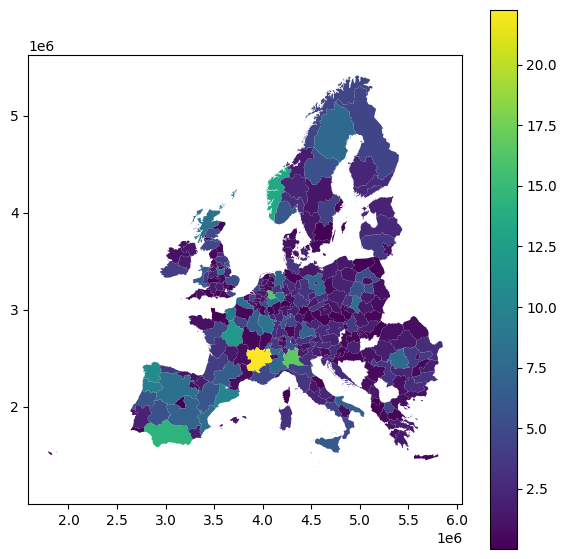

In [48]:
nuts2.plot(figsize=(7, 7), column=cap, legend=True)

Text(0.5, 1.0, 'Power generation in GW by NUTS-2 region')

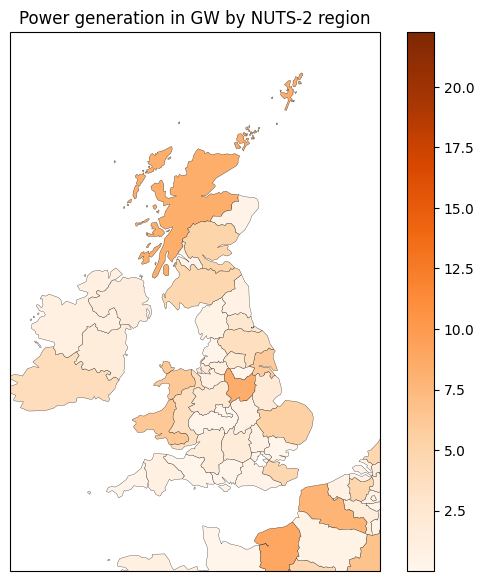

In [49]:
fig = plt.figure(figsize=(7, 7))

ax = plt.axes(projection=ccrs.epsg(3035))
plt.set_cmap("Oranges") #changes colormap

nuts2.plot(ax=ax,column=cap, edgecolor="black", facecolor="lightgrey",legend=True,linewidth=0.2)


ax.set_extent([3, -9, 49, 61]) # set extent to UK - note that dataset is europewide
plt.title("Power generation in GW by NUTS-2 region") #adds title

This concludes the `geopandas` and `cartopy` tutorial.

## Exercises

**Task 1:** Recreate the figure above (i.e. generation capacity per NUTS2 region)
- using 3 different [cartopy projections](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html) of your choice.
- such that the capacities are normalised by the **area** of the NUTS2 region (unit: MW/km²).
- such that it only shows the **hard coal power** plant capacities.
- such that it only shows NUTS2 shapes for Germany.
- with NUTS3 regions instead of NUTS2 regions.

**Question:** Which UK NUTS2 regions have the highest conventional generation capacity? Can you think of reasons why?

Three projections of choice:

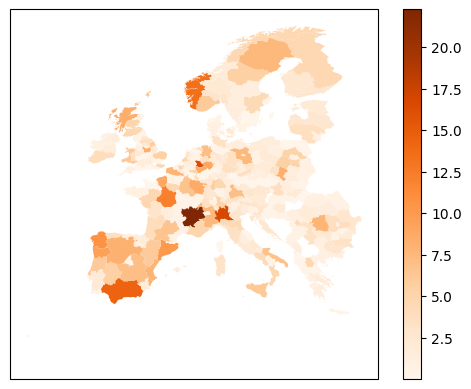

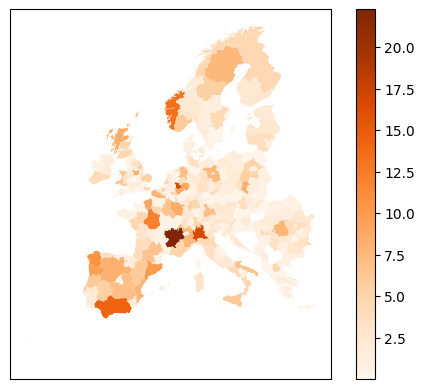

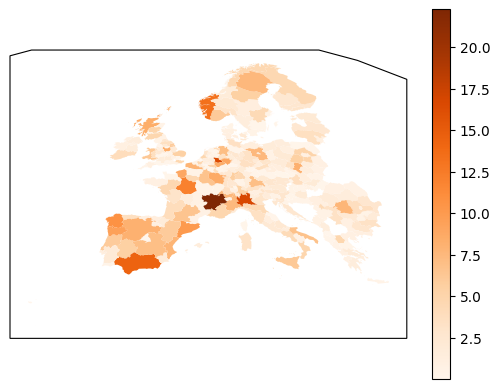

In [50]:
# @title Code to show using 3 different cartopy projections
for crs in [ccrs.EqualEarth(), ccrs.AlbersEqualArea(), ccrs.Orthographic()]:
    fig = plt.figure()
    ax = plt.axes(projection=crs)
    nuts2.to_crs(crs.proj4_init).plot(ax=ax, column=cap, legend=True)

Normalised by area in MW/km²:

<Axes: >

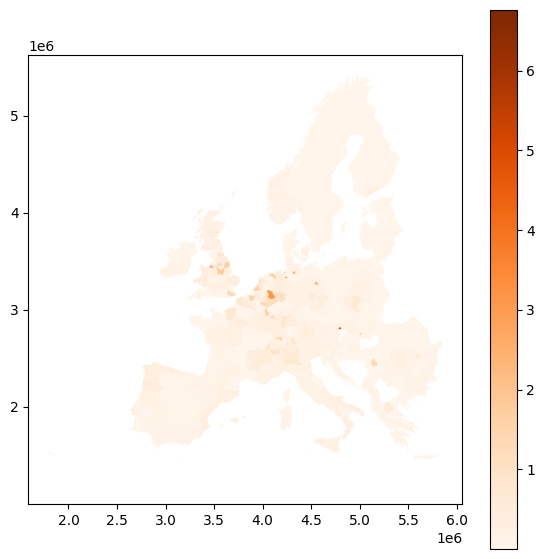

In [51]:
# @title Normalised by area in MW/km²:
nuts2.plot(figsize=(7, 7), column=cap / (nuts2.area / 1e9), legend=True)

Only hard coal generators:

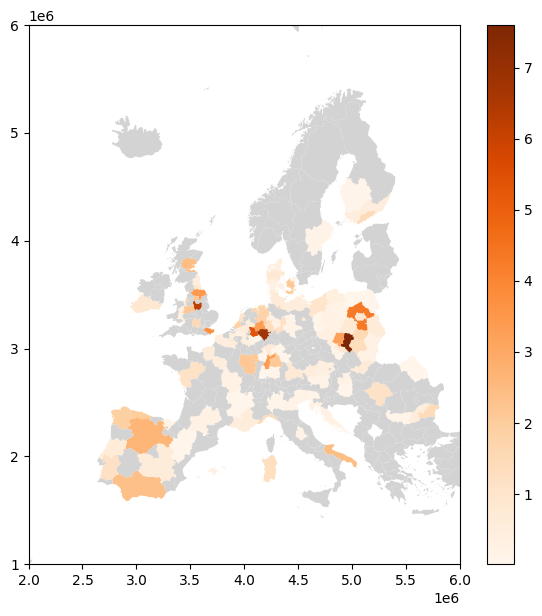

In [52]:
# @title Only hard coal generators:
hard_coal_cap = (
    joined.query("Fueltype == 'Hard Coal'")
    .groupby("NUTS_ID")
    .Capacity.sum()
    .reindex(nuts2.index)
    .div(1e3)
)
nuts2.plot(
    figsize=(7, 7),
    column=hard_coal_cap,
    legend=True,
    missing_kwds=dict(color="lightgrey"),
)
plt.ylim(1e6, 6e6)
plt.xlim(2e6, 6e6);

Only Germany:

<Axes: >

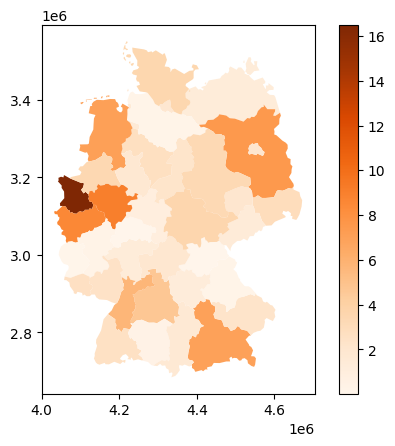

In [53]:
# @title Code to show only Germany
subregion = nuts2.query("CNTR_CODE == 'DE'")
subregion.plot(column=cap.reindex(subregion.index), legend=True)

Only Germany and Denmark:

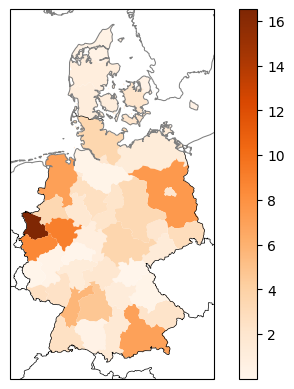

In [54]:
# @title Code to show only Germany and Denmark:
countries = ["DE", "DK"]
#subregion = nuts2.query("CNTR_CODE in @countries")  # alternative A
subregion = nuts2.loc[nuts2.CNTR_CODE.isin(countries)]  # alternative B
ax = plt.axes(projection=ccrs.epsg(3035))
subregion.plot(ax=ax,column=cap.reindex(subregion.index), legend=True)

ax.add_feature(cartopy.feature.BORDERS, color="black", linewidth=0.5)
ax.coastlines(linewidth=0.75,color="grey")

In NUTS3 rather than NUTS2:

<Axes: >

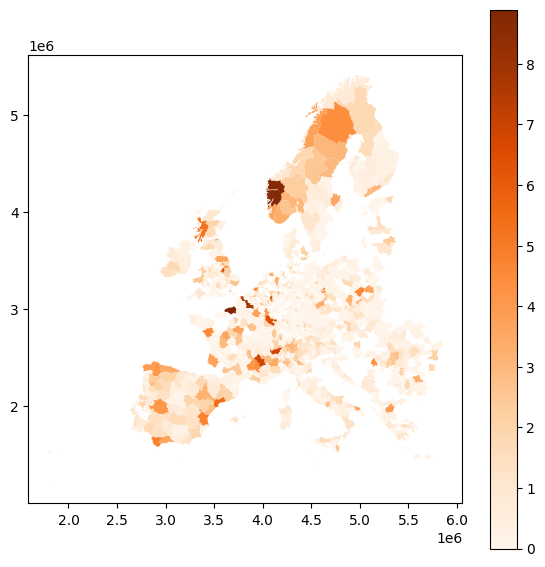

In [55]:
# @title Show NUTS3 data
nuts3 = nuts.query("LEVL_CODE == 3").to_crs(3035)
joined3 = gdf_ppl.sjoin(nuts3)
cap3 = joined3.groupby("NUTS_ID").Capacity.sum().reindex(nuts3.index).div(1000)  # GW
nuts3.plot(figsize=(7, 7), column=cap3, legend=True)

NUTS2 region with highest capacity:

In [56]:
# @title Find NUTS2 region with highest capacity:
#countries=["UK"]
nuts_uk = nuts2.loc[nuts2.CNTR_CODE.isin(["UK"])]  # alternative B
joined_uk = gdf_ppl.sjoin(nuts_uk)
cap_uk = joined_uk.groupby("NUTS_ID").Capacity.sum().reindex(nuts_uk.index).div(1000)  # GW
#cap_uk = joined3.groupby("NUTS_ID").Capacity.sum().reindex(uk_region3.index).div(1000)  # GW
cap_uk.sort_values(ascending=False).head(5)  # alternative A

id
UKF1    8.523645
UKM6    8.428300
UKL1    6.248900
UKE1    5.967700
UKH1    5.419600
Name: Capacity, dtype: float64

In [57]:
# @title Identify top 5 NUTS2 UK regions by capacity
#find top 5 UK NUTS2 region codes by capacity
top_5=cap_uk.sort_values(ascending=False).head(5)

#find information about NUTS2 regions from NUTS data
nuts[nuts['NUTS_ID'].isin(list(top_5.index.values))] #NOTE these are NOT returned in capacity order!


NUTS_ID  LEVL_CODE CNTR_CODE                                 NAME_LATN  \
id                                                                            
UKM6    UKM6          2        UK                     Highlands and Islands   
UKE1    UKE1          2        UK  East Yorkshire and Northern Lincolnshire   
UKL1    UKL1          2        UK                West Wales and The Valleys   
UKF1    UKF1          2        UK            Derbyshire and Nottinghamshire   
UKH1    UKH1          2        UK                               East Anglia   

                                     NUTS_NAME  MOUNT_TYPE  URBN_TYPE  \
id                                                                      
UKM6                     Highlands and Islands         0.0          0   
UKE1  East Yorkshire and Northern Lincolnshire         0.0          0   
UKL1                West Wales and The Valleys         0.0          0   
UKF1            Derbyshire and Nottinghamshire         0.0          0   
UKH1                               East Anglia         0.0          0   

      COAST_TYPE   FID                                           geometry  
id                                                                         
UKM6           0  UKM6  MULTIPOLYGON (((-0.79878 60.81101, -0.78043 60...  
UKE1           0  UKE1  POLYGON ((-0.20053 54.15159, -0.12935 54.11553...  
UKL1           0  UKL1  MULTIPOLYGON (((-3.37501 52.89247, -3.48044 52...  
UKF1           0  UKF1  POLYGON ((-1.59912 53.31132, -1.32467 53.32881...  
UKH1           0  UKH1  POLYGON ((1.67548 52.74269, 1.73639 52.64175, ...